<a href="https://colab.research.google.com/github/osmanbatuhansahin/MyDataScienceExercises/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yeni Bölüm

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import csv
from sklearn.preprocessing import OneHotEncoder

#close warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data

import io
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olmypicsEDA/athlete_events.csv")
data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
#drop id and games cols
data = data.drop(["ID","Games"], axis = 1)
data.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
#Replace NaN values of height and weight columns with mean of event
unique_event = pd.unique(data.Event)
print("Unique event number is: ",len(unique_event))

Unique event number is:  765


In [ ]:
data2 = data.copy()
hwlist = list(("Height","Weight"))

for i in unique_event:
    event_filter = data2.Event == i
    data_filtered = data2[event_filter]
    
    for j in hwlist:
        mean = np.round(np.mean(data_filtered[j]),2)
        if ~np.isnan(mean):
          data_filtered[j]=data_filtered[j].fillna(mean)

        else:
          mean_all = np.round(np.mean(data[j]),2)
          data_filtered[j]=data_filtered[j].fillna(mean_all)
    data2[event_filter] = data_filtered

data = data2.copy()

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
#Replace NaN values of age column with mean
mean_age = np.round(np.mean(data.Age),2)
data["Age"] = data["Age"].fillna(mean_age)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
#Remove athletes without medal
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39051 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39051 non-null  object 
 1   Sex     39051 non-null  object 
 2   Age     39051 non-null  float64
 3   Height  39051 non-null  float64
 4   Weight  39051 non-null  float64
 5   Team    39051 non-null  object 
 6   NOC     39051 non-null  object 
 7   Year    39051 non-null  int64  
 8   Season  39051 non-null  object 
 9   City    39051 non-null  object 
 10  Sport   39051 non-null  object 
 11  Event   39051 non-null  object 
 12  Medal   39051 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
#save clean data
data.to_csv("/content/drive/MyDrive/Colab Notebooks/olmypicsEDA/olympics_clean.csv",index=False)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olmypicsEDA/olympics_clean.csv")

In [ ]:
#histogram func for numeric cols
def plotHist(col):

  plt.figure
  plt.hist(data[col],bins=100)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

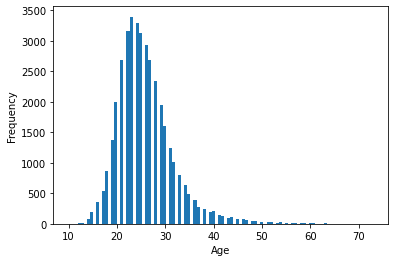

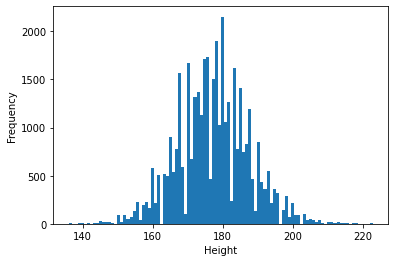

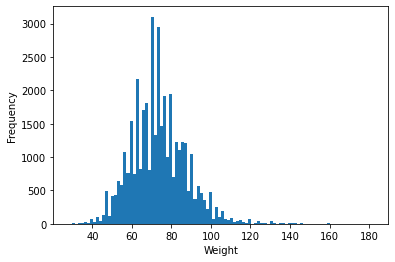

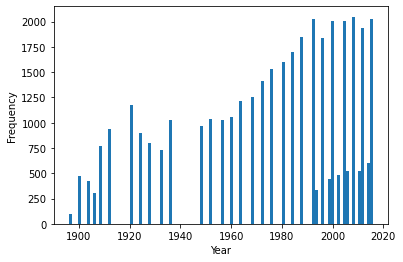

In [ ]:
numeric_cols = ["Age","Height","Weight","Year"]
for i in numeric_cols:
  plotHist(i)

With this histograms we can say "Age","Height","Weight" cols have gauss distribution. There were no olympics during the war years. Recently, the Winter and Summer Olympics have been organized in different years. 

```
# Bu, kod olarak biçimlendirilmiştir
```



In [ ]:
data.describe()

,Age,Height,Weight,Year
count,39051.000000,39051.000000,39051.000000,39051.000000
mean,25.925175,177.359357,73.728648,1975.102456
std,5.914026,10.232385,14.048013,32.996672
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1956.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


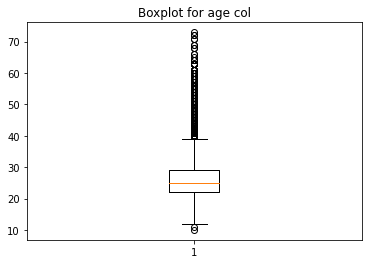

In [ ]:
plt.boxplot(data.Age)
plt.title("Boxplot for age col")
plt.show()

The reason for the old age outliers was that there were art events in the first Olympics.

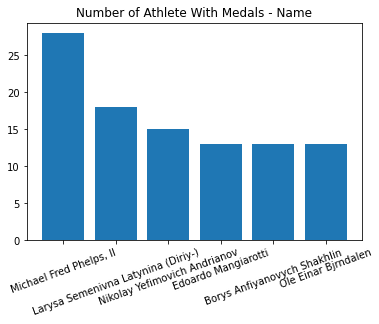

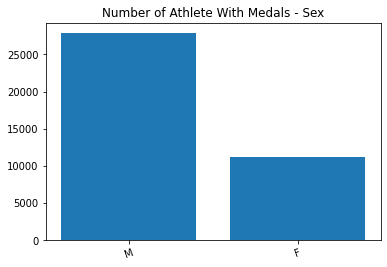

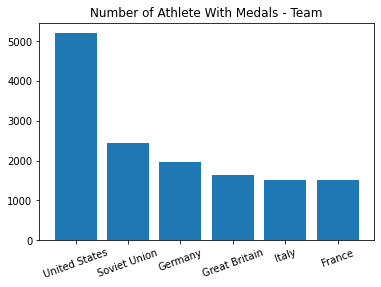

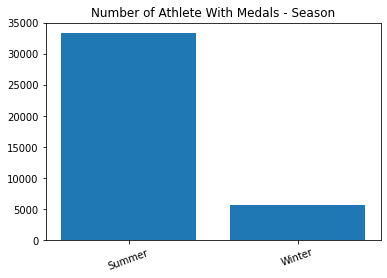

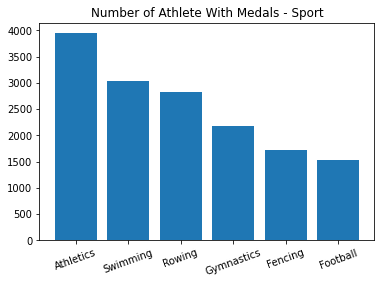

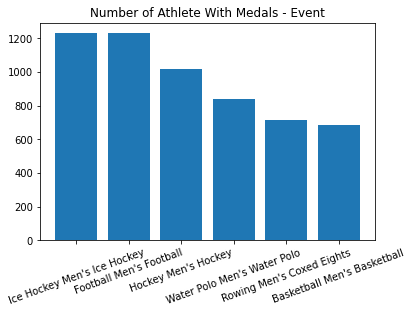

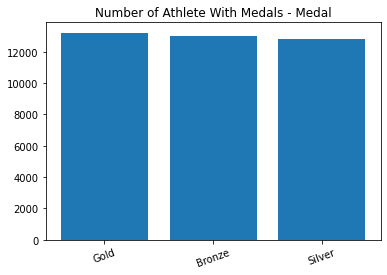

In [ ]:
#plotbars for categorical cols
def plotBar(col):
  datac = data[col]
  datac_count = datac.value_counts()
  datac_count = datac_count[:6]
  plt.figure()
  plt.bar(datac_count.index, datac_count)
  plt.xticks(rotation=20)
  plt.title("Number of Athlete With Medals - {}".format(col))
  plt.show()

categorical_cols = ["Name","Sex","Team","Season","Sport","Event","Medal"]
for i in categorical_cols:
  plotBar(i)

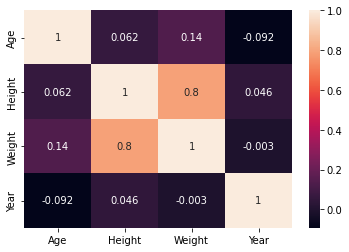

In [ ]:
corr_mat = data.loc[:,numeric_cols].corr()
sn.heatmap(corr_mat, annot = True)

In [ ]:
#one-hot encoding to medals col
data3 = data.copy()
data3 = pd.get_dummies(data3, columns=["Medal"])
data3.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [ ]:
#teams and medals
data3[["Team","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Team"],as_index=True).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,Medal_Bronze,Medal_Gold,Medal_Silver
Team,,,
United States,1230.0,2472.0,1503.0
Soviet Union,677.0,1058.0,716.0
Germany,674.0,676.0,620.0
Italy,481.0,534.0,506.0
Great Britain,554.0,515.0,560.0
France,565.0,453.0,502.0
Sweden,507.0,451.0,476.0
Hungary,365.0,432.0,329.0
Canada,404.0,421.0,409.0


In [ ]:
#pivot table
pivot = data.pivot_table(index = "Medal", columns = "Sex",
                         values = ["Height","Weight","Age"],
                         aggfunc=np.mean)
pivot

Age                 Height                 Weight           
Sex             F          M           F           M          F          M
Medal                                                                     
Bronze  24.708743  26.355729  170.023946  180.155422  62.780175  77.933042
Gold    24.372596  26.504641  170.445636  180.383763  63.195668  78.248769
Silver  24.444891  26.633194  170.224395  180.172708  62.856256  78.069363

In [ ]:
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("lower limit is:",lower_limit)
    print("upper limit is:",upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies


In [ ]:
#number of anomalies
print("number of anomalies for height col is:",len(find_anomalies(data.Height)))
print("number of anomalies for weight col is:",len(find_anomalies(data.Weight)))
print("number of anomalies for age col is:",len(find_anomalies(data.Age)))

lower limit is: 146.66259508765242
upper limit is: 208.0561183895891
number of anomalies for height col is: 198
lower limit is: 31.585148863880335
upper limit is: 115.87214766288193
number of anomalies for weight col is: 345
lower limit is: 8.183323042799763
upper limit is: 43.66702650010567
number of anomalies for age col is: 662


In [ ]:
data_time = data.copy()
unique_years = np.sort(data_time.Year.unique())
unique_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

In [ ]:
date_time = pd.to_datetime(data_time.Year, format = "%Y")
data_time["date_time"] = date_time
data_time = data_time.set_index("date_time")
data_time.drop(["Year"], axis=1,inplace=True)
data_time.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
date_time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
#Changes on age, height and weight with years
data_2year = data_time.resample("2A").mean()
data_2year.head()

,Age,Height,Weight
date_time,,,
1896-12-31,23.217822,173.726436,71.277327
1898-12-31,NaN,NaN,NaN
1900-12-31,28.433761,177.874679,74.948205
1902-12-31,NaN,NaN,NaN
1904-12-31,26.485782,177.286256,73.857583


In [ ]:
#drop missing values
data_2year.dropna(axis = 0, inplace = True)
data_2year.head()

,Age,Height,Weight
date_time,,,
1896-12-31,23.217822,173.726436,71.277327
1900-12-31,28.433761,177.874679,74.948205
1904-12-31,26.485782,177.286256,73.857583
1906-12-31,26.931596,176.687622,74.793160
1908-12-31,27.739869,176.659111,73.375333


<Figure size 432x288 with 0 Axes>

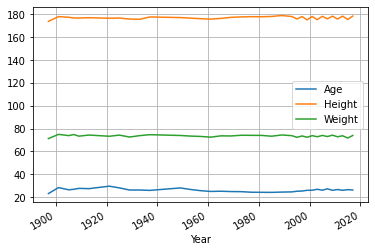

In [ ]:
plt.figure()
data_2year.plot()
plt.xlabel("Year")
plt.grid()
plt.show()

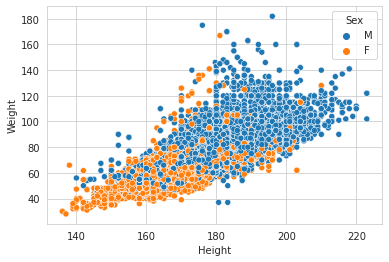

In [ ]:
#scatter plot of athletes with medal Height vs Weight and hue = Sex
sn.set_style("whitegrid")
sn.scatterplot(x="Height",y="Weight",hue="Sex",data=data)
plt.show()

<function matplotlib.pyplot.show>

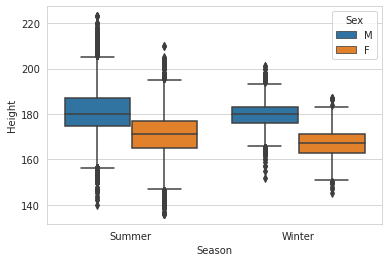

In [ ]:
sn.boxplot(x="Season",y="Height",hue="Sex",data=data)
plt.show